# k- nearest neighbor (KNN)

In [1]:
# get methods from py-file in other directory
from modules.data_exploration.data_ex import import_data, gen_bulk_data, get_bulk_inst
from modules.build_ml_models.KNN_classification import KNN_classification


In [2]:
file_path = 'data/churn.csv'
data = import_data(file_path)
display(data)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


## Get data

In [3]:
data_dict = gen_bulk_data(file_path)

In [4]:
data_dict.keys()

dict_keys(['original', 'dropped', 'scaled', 'scaled and dropped'])

## Prediction with *original* data

In [5]:
key = 'original'

x_train, x_test, x_val, y_train, y_test, y_val = get_bulk_inst(data_dict, key)



In [6]:
x_train.drop(columns=['index'], inplace=True)
print(x_train.shape)
x_train

(3500, 20)


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,3,106,408,3036,0,0,0,273.8,120,46.55,149.3,104,12.69,193.9,127,8.73,11.2,3,3.02,0
1,19,88,415,4807,0,0,0,264.8,124,45.02,245.4,112,20.86,160.5,115,7.22,14.8,2,4.00,1
2,25,132,510,2435,0,0,0,126.8,83,21.56,243.2,97,20.67,223.4,106,10.05,7.1,5,1.92,3
3,26,96,415,220,0,0,0,97.6,98,16.59,105.5,118,8.97,220.2,105,9.91,11.6,9,3.13,1
4,7,70,415,967,0,0,0,152.8,145,25.98,183.6,102,15.61,151.8,75,6.83,10.5,2,2.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,49,44,408,424,0,0,0,213.2,85,36.24,224.0,128,19.04,137.8,74,6.20,12.5,5,3.38,1
3496,41,138,510,1200,0,0,0,127.1,102,21.61,247.7,106,21.05,207.7,75,9.35,5.0,3,1.35,3
3497,23,109,408,4597,0,0,0,162.6,138,27.64,154.0,109,13.09,209.7,118,9.44,11.5,4,3.11,0
3498,33,91,408,538,0,0,0,133.7,75,22.73,195.3,87,16.60,280.5,89,12.62,5.9,2,1.59,0


In [7]:
x_test.drop(columns=['index'], inplace=True)
print(x_test.shape)
x_test

(750, 20)


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,46,122,415,3078,0,0,0,136.7,115,23.24,243.1,137,20.66,188.9,110,8.50,8.6,4,2.32,0
1,8,224,510,1792,1,0,0,171.5,99,29.16,160.0,103,13.60,212.4,102,9.56,5.0,2,1.35,1
2,19,136,408,2108,1,0,0,199.6,89,33.93,211.4,96,17.97,72.4,84,3.26,11.0,4,2.97,3
3,16,87,510,838,0,0,0,115.4,90,19.62,262.6,68,22.32,245.7,69,11.06,13.1,5,3.54,2
4,14,55,415,3716,1,0,0,269.6,121,45.83,171.7,91,14.59,219.0,98,9.86,8.2,6,2.21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,43,82,415,1657,0,0,0,130.0,110,22.10,185.3,88,15.75,178.7,105,8.04,8.3,4,2.24,0
746,23,46,415,1505,0,0,0,214.1,72,36.40,164.4,104,13.97,177.5,113,7.99,8.2,3,2.21,2
747,13,40,510,4479,0,0,0,146.4,105,24.89,196.4,143,16.69,235.6,123,10.60,9.4,3,2.54,3
748,28,87,415,842,1,1,40,221.6,79,37.67,157.1,74,13.35,222.4,124,10.01,11.5,3,3.11,1


In [8]:
y_train

4653    0
455     1
3709    0
695     0
3039    0
       ..
3902    0
1655    0
1281    0
463     0
4715    0
Name: class, Length: 3500, dtype: int64

In [9]:
my_classification = KNN_classification()

KNN Classification created


In [10]:
print(my_classification.KNNmodel)

KNeighborsClassifier()


In [11]:
my_classification.set_train(x_train, y_train)
my_classification.set_test(x_test, y_test)
my_classification.fit()
my_classification.predict()


In [12]:
print(my_classification.get_test_accuracy())

0.864


In [13]:
print(my_classification.get_cross_validation_accuracy())

0.8614285714285714


Square-root of number of datasets: 59
Best Score: 0.8617142857142857
Best k: 7
Best Weights: uniform


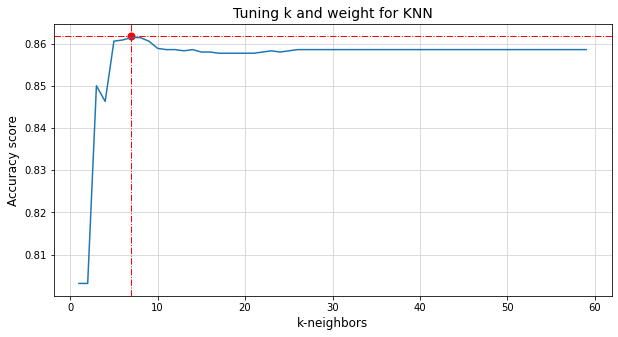

0.8613333333333333


In [14]:
my_classification.tune_parameters()
my_classification.print_tuning_results()
my_classification.plot_tuning_k_results()
print(my_classification.get_test_accuracy())

Predicted,no churn,churn
Actual,,
no churn,642,2
churn,102,4


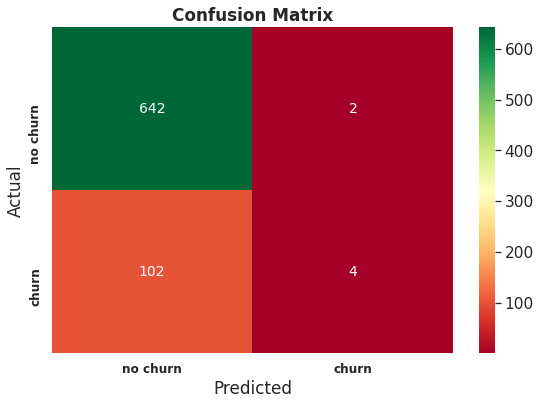


Classification report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       644
           1       0.67      0.04      0.07       106

    accuracy                           0.86       750
   macro avg       0.76      0.52      0.50       750
weighted avg       0.84      0.86      0.80       750



In [15]:
my_classification.plot_confusion_matrix(normalize=None)

The KNN predicts most of the time "no churn" an the accuracy corresponds to the occurance of "no churn in the data. For no churn the result is impressive but for churn there is no real benefit since approx 90% of the churn is not detected. 
So KNN can be seen more as a contant output than a real prediction but a kind of constant output

In [16]:
#from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
#from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
#from sklearn.metrics import precision_recall_curve, average_precision_score

#classification_report()

## Prediction with *scaled* data

In [17]:
key = 'scaled'
x_train = data_dict[key]['x_train']
y_train = data_dict[key]['y_train']
x_val = data_dict[key]['x_val']
y_val = data_dict[key]['y_val']
x_test = data_dict[key]['x_test']
y_test = data_dict[key]['y_test']


In [18]:
#x_train.drop(columns=['index'], inplace=True)
x_train

,index,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_customer_service_calls,number_vmail_messages,total_day_minutes,...,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
0,4653,3,106,408,3036,0,0,0,-0.577950,1.744961,...,1.745353,-1.020752,0.207549,-1.020920,-0.128080,1.371491,-0.126141,0.331029,-0.575165,0.325017
1,455,19,88,415,4807,0,0,1,-0.577950,1.576605,...,1.576996,0.865936,0.607230,0.866123,-0.787482,0.764905,-0.788598,1.634210,-0.983414,1.639093
2,3709,25,132,510,2435,0,0,3,-0.577950,-1.004851,...,-1.004479,0.822745,-0.142172,0.822238,0.454327,0.309966,0.452960,-1.153150,0.241333,-1.149966
3,695,26,96,415,220,0,0,1,-0.577950,-1.551072,...,-1.551365,-1.880658,0.906991,-1.880137,0.391150,0.259417,0.391540,0.475827,1.874330,0.472516
4,3039,7,70,415,967,0,0,1,-0.577950,-0.518489,...,-0.518114,-0.347355,0.107628,-0.346481,-0.959243,-1.257049,-0.959696,0.077632,-0.983414,0.083656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3902,49,44,408,424,0,0,1,-0.577950,0.611365,...,0.610868,0.445800,1.406592,0.445753,-1.235639,-1.307598,-1.236085,0.801622,0.241333,0.807739
3496,1655,41,138,510,1200,0,0,3,-0.577950,-0.999239,...,-0.998977,0.911091,0.307469,0.910008,0.144368,-1.257049,0.145861,-1.913339,-0.575165,-1.914275
3497,1281,23,109,408,4597,0,0,0,-0.577950,-0.335169,...,-0.335452,-0.928479,0.457349,-0.928532,0.183853,0.916552,0.185345,0.439627,-0.166916,0.445698
3498,463,33,91,408,538,0,0,0,-0.577950,-0.875778,...,-0.875736,-0.117655,-0.641774,-0.117819,1.581629,-0.549365,1.580453,-1.587544,-0.983414,-1.592460


In [19]:
y_train

4653    0
455     1
3709    0
695     0
3039    0
       ..
3902    0
1655    0
1281    0
463     0
4715    0
Name: class, Length: 3500, dtype: int64

In [20]:
my_classification = KNN_classification()

KNN Classification created


In [21]:
print(my_classification.KNNmodel)

KNeighborsClassifier()


In [22]:
my_classification.set_train(x_train, y_train)
my_classification.set_test(x_test, y_test)
my_classification.fit()
my_classification.predict()


In [23]:
print(my_classification.get_test_accuracy())

0.8426666666666667


In [24]:
print(my_classification.get_cross_validation_accuracy())

0.8434285714285714


Square-root of number of datasets: 59
Best Score: 0.8588571428571429
Best k: 13
Best Weights: uniform


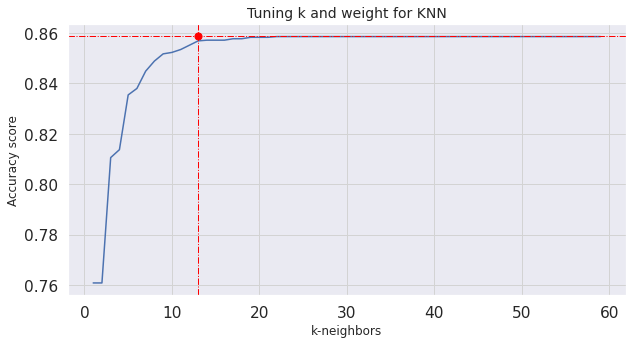

0.8546666666666667


In [25]:
my_classification.tune_parameters()
my_classification.print_tuning_results()
my_classification.plot_tuning_k_results()
print(my_classification.get_test_accuracy())

Predicted,no churn,churn
Actual,,
no churn,641,3
churn,106,0


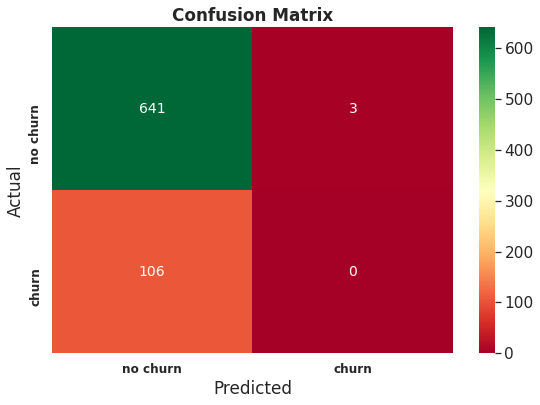


Classification report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       644
           1       0.00      0.00      0.00       106

    accuracy                           0.85       750
   macro avg       0.43      0.50      0.46       750
weighted avg       0.74      0.85      0.79       750



In [26]:
my_classification.plot_confusion_matrix(normalize=None)